<a href="https://colab.research.google.com/github/RutujaBelkare/Movie-Rating-Analysis/blob/main/Movie_rating_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

In [11]:
df = pd.read_csv("/content/IMDB Dataset.csv")

In [12]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [13]:
print(df.isnull().sum())

review       0
sentiment    0
dtype: int64


In [14]:
df['sentiment'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [15]:
def categorize_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

<ipython-input-8-1d885de74cff>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_category', palette='viridis')


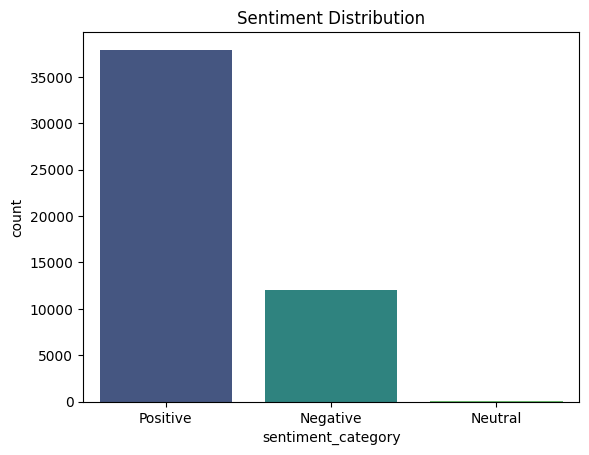

In [ ]:
sns.countplot(data=df, x='sentiment_category', palette='viridis')
plt.title("Sentiment Distribution")
plt.show()

In [ ]:
positive_text = " ".join(df[df['sentiment_category'] == "Positive"]["review"])
negative_text = " ".join(df[df['sentiment_category'] == "Negative"]["review"])

(-0.5, 399.5, 399.5, -0.5)

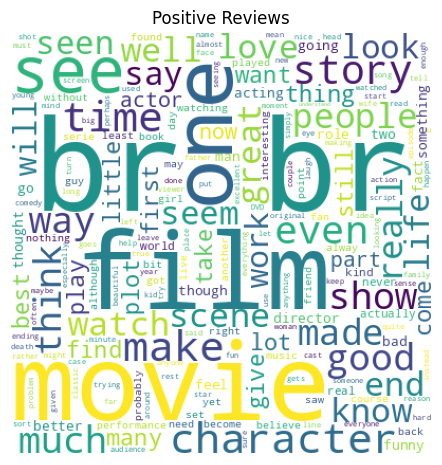

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=400, height=400, background_color='white').generate(positive_text))
plt.title("Positive Reviews")
plt.axis("off")

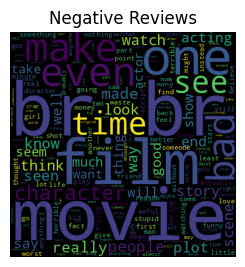

In [ ]:
plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=400, height=400, background_color='black').generate(negative_text))
plt.title("Negative Reviews")
plt.axis("off")
plt.show()

<ipython-input-13-f2c20bc35dfa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rating', y='sentiment', palette='coolwarm')


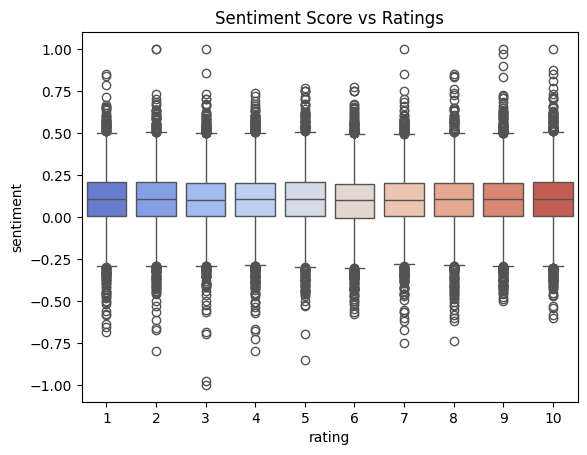

In [ ]:
df['rating'] = np.random.randint(1, 11, df.shape[0])  # Dummy ratings from 1-10 (if dataset lacks ratings)
sns.boxplot(data=df, x='rating', y='sentiment', palette='coolwarm')
plt.title("Sentiment Score vs Ratings")
plt.show()

In [ ]:
print("Analysis Completed!")

Analysis Completed!
